In [1]:
# Importando bibliotecas a serem utilizadas no modelo
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
# Carregando o dataset
atributos = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Class']
iris = pd.read_csv('iris.data', names=atributos)

In [5]:
# Verificando tamanho do dataset
iris.shape

(150, 5)

In [6]:
# Verificando o cabeçalho dos dados
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
# Realiando análise estatística resumida
iris.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
#Verificando as colunas existentes no dataset
iris.columns

Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Class'], dtype='object')

In [11]:
#Realizando a contagem de dados por classificação de flores
iris['Class'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Class, dtype: int64

In [13]:
# Verificando a existência de valores nulos no dataset
iris.isnull().values.any()

False

In [14]:
# Verificando a correlação dos dados
print(iris.corr())

             SepalLength  SepalWidth  PetalLength  PetalWidth
SepalLength     1.000000   -0.109369     0.871754    0.817954
SepalWidth     -0.109369    1.000000    -0.420516   -0.356544
PetalLength     0.871754   -0.420516     1.000000    0.962757
PetalWidth      0.817954   -0.356544     0.962757    1.000000


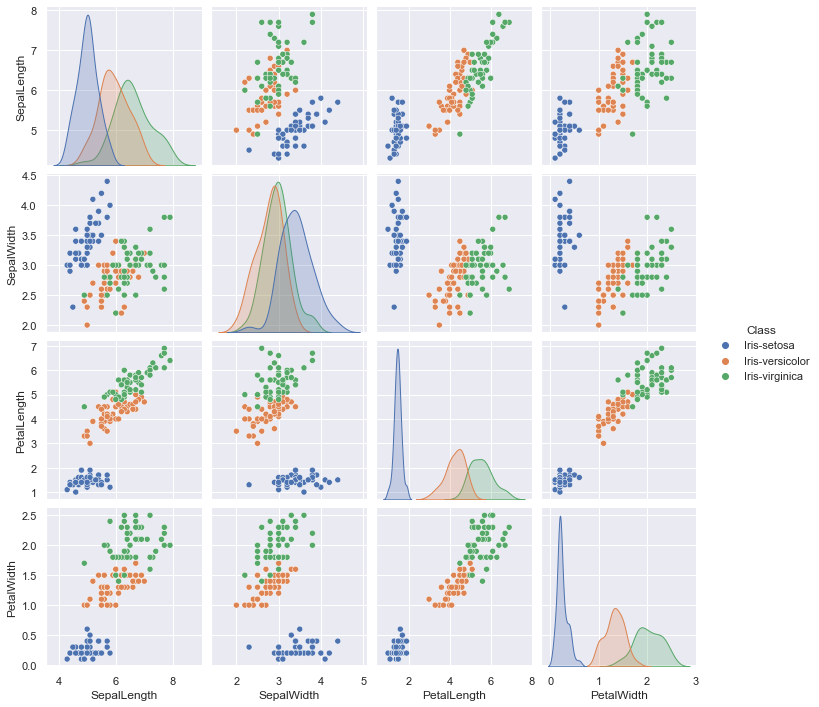

In [15]:
# Realizando a verificação da distribuição dos dados em um gráfico Pair Plot
sns.set(style = "darkgrid")
sns.pairplot(iris, hue = "Class", height = 2.5)

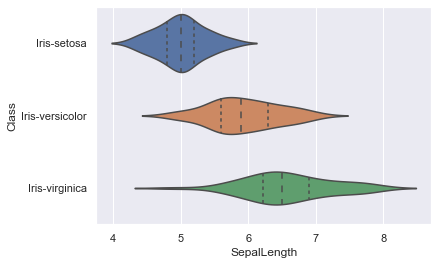

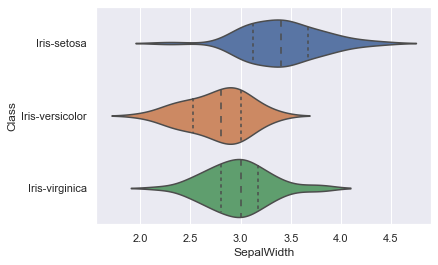

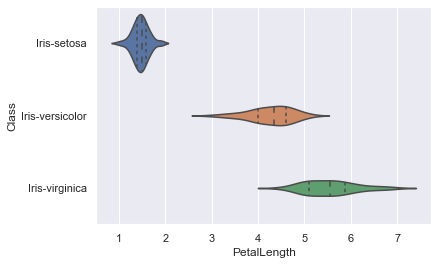

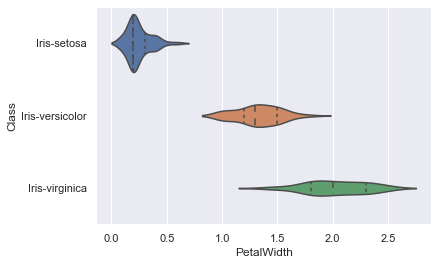

In [16]:
# Avaliando a concentração de valores por tipo de flor e atributos
g = sns.violinplot(y='Class', x='SepalLength', data=iris, inner='quartile')
plt.show()
g = sns.violinplot(y='Class', x='SepalWidth', data=iris, inner='quartile')
plt.show()
g = sns.violinplot(y='Class', x='PetalLength', data=iris, inner='quartile')
plt.show()
g = sns.violinplot(y='Class', x='PetalWidth', data=iris, inner='quartile')
plt.show()

In [18]:
# Separando as variáveis dependentes e independentes
X = iris[iris.columns.difference(['Class'])].values
Y = iris['Class'].values

In [19]:
# Método Ensemble par Seleção de Variáveis
# Importância do Atributo com o Extra Trees Classifier
# Usado para estimar a importância de cada atributo. Esse método retorna um score para cada atributo.
# Quanto maior o score, maior a importância do atributo. Neste dataset usarei todos os atributos dada a baixa quantidade de atributos.
from sklearn.ensemble import ExtraTreesClassifier

# Criação do Modelo - Feature Selection
modelo = ExtraTreesClassifier()
modelo.fit(X, Y)

# Print dos Resultados
print(iris.columns[0:4])
print(modelo.feature_importances_)

Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth'], dtype='object')
[0.38965971 0.43513055 0.10600569 0.06920405]


### Dados de Treino e de Teste

In [20]:
# Importando as bibliotecas e funções
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Definindo o tamanho das amostras
teste_size = 0.33

# Garante que os resultados podem ser reproduzidos
# Isso é importante para comparar a acurácia com outros algoritmos de Machine Learning.
seed = 7

# Criando os conjuntos de dados de treino e de teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = teste_size, random_state = seed)

### Modelo de Regressão Logística

In [22]:
# Importando as bibliotecas e funções
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Criando o modelo
modelo = LogisticRegression()

# Treinamento do modelo
modelo.fit(X_treino, Y_treino)

# Fazendo as previsões e construindo o relatório
previsoes = modelo.predict(X_teste)
result_LR = modelo.score(X_teste, Y_teste)
report = classification_report(Y_teste, previsoes)

# Imprimindo o relatório
print(report)
print("Acurácia nos Dados de Teste: %.3f%%" % (result_LR * 100.0))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.89      0.89      0.89        18
 Iris-virginica       0.89      0.89      0.89        18

       accuracy                           0.92        50
      macro avg       0.93      0.93      0.93        50
   weighted avg       0.92      0.92      0.92        50

Acurácia nos Dados de Teste: 92.000%


### Modelo Linear Discriminant Analysis

In [23]:
# Importando as bibliotecas e funções
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Criando e treinando o modelo
modelo = LinearDiscriminantAnalysis()
modelo.fit(X_treino, Y_treino)

# Fazendo as previsões e construindo o relatório
previsoes = modelo.predict(X_teste)
report = classification_report(Y_teste, previsoes)
result_LDA = modelo.score(X_teste, Y_teste)

# Imprimindo o relatório
print(report)
print("Acurácia nos Dados de Teste: %.3f%%" % (result_LDA * 100.0))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.94      0.94      0.94        18
 Iris-virginica       0.94      0.94      0.94        18

       accuracy                           0.96        50
      macro avg       0.96      0.96      0.96        50
   weighted avg       0.96      0.96      0.96        50

Acurácia nos Dados de Teste: 96.000%


### Modelo KNN - K Nearest Neighbors

In [25]:
# Importando as bibliotecas e funções
from sklearn.neighbors import KNeighborsClassifier

# Criando e treinando o modelo
modelo = KNeighborsClassifier()
modelo.fit(X_treino, Y_treino)

# Fazendo as previsões e construindo o relatório
previsoes = modelo.predict(X_teste)
report = classification_report(Y_teste, previsoes)
result_KNN = modelo.score(X_teste, Y_teste)

# Imprimindo o relatório
print(report)
print("Acurácia nos Dados de Teste: %.3f%%" % (result_KNN * 100.0))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.85      0.94      0.89        18
 Iris-virginica       0.94      0.83      0.88        18

       accuracy                           0.92        50
      macro avg       0.93      0.93      0.93        50
   weighted avg       0.92      0.92      0.92        50

Acurácia nos Dados de Teste: 92.000%


### Modelo Naive Bayes

In [26]:
# Importando as bibliotecas e funções
from sklearn.naive_bayes import GaussianNB

# Criando e treinando o modelo
modelo = GaussianNB()
modelo.fit(X_treino, Y_treino)

# Fazendo as previsões e construindo o relatório
previsoes = modelo.predict(X_teste)
report = classification_report(Y_teste, previsoes)
result_NB = modelo.score(X_teste, Y_teste)

# Imprimindo o relatório
print(report)
print("Acurácia nos Dados de Teste: %.3f%%" % (result_NB * 100.0))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.88      0.83      0.86        18
 Iris-virginica       0.84      0.89      0.86        18

       accuracy                           0.90        50
      macro avg       0.91      0.91      0.91        50
   weighted avg       0.90      0.90      0.90        50

Acurácia nos Dados de Teste: 90.000%


### CART - Classification and Regression Trees

In [27]:
# Importando as bibliotecas e funções
from sklearn.tree import DecisionTreeClassifier

# Criando e treinando o modelo
modelo = DecisionTreeClassifier()
modelo.fit(X_treino, Y_treino)

# Fazendo as previsões e construindo o relatório
previsoes = modelo.predict(X_teste)
report = classification_report(Y_teste, previsoes)
result_CART = modelo.score(X_teste, Y_teste)

# Imprimindo o relatório
print(report)
print("Acurácia nos Dados de Teste: %.3f%%" % (result_CART * 100.0))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.88      0.78      0.82        18
 Iris-virginica       0.80      0.89      0.84        18

       accuracy                           0.88        50
      macro avg       0.89      0.89      0.89        50
   weighted avg       0.88      0.88      0.88        50

Acurácia nos Dados de Teste: 88.000%


### Modelo SVM - Support Vector Machines

In [28]:
# Importando as bibliotecas e funções
from sklearn.svm import SVC

# Criando e treinando o modelo
modelo = SVC()
modelo.fit(X_treino, Y_treino)

# Fazendo as previsões e construindo o relatório
previsoes = modelo.predict(X_teste)
report = classification_report(Y_teste, previsoes)
result_SVM = modelo.score(X_teste, Y_teste)

# Imprimindo o relatório
print(report)
print("Acurácia nos Dados de Teste: %.3f%%" % (result_SVM * 100.0))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.81      0.94      0.87        18
 Iris-virginica       0.93      0.78      0.85        18

       accuracy                           0.90        50
      macro avg       0.91      0.91      0.91        50
   weighted avg       0.91      0.90      0.90        50

Acurácia nos Dados de Teste: 90.000%


LR: 0.946667 (0.058119)
LDA: 0.966667 (0.061464)
NB: 0.946667 (0.058119)
KNN: 0.933333 (0.084327)
CART: 0.933333 (0.094281)
SVM: 0.933333 (0.073030)


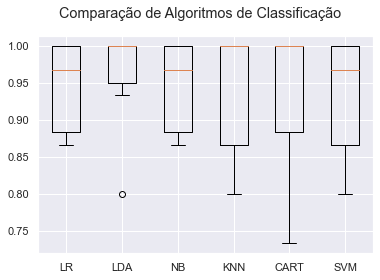

In [29]:
# Seleção do Modelo Preditivo utilizando o método de cross validation
# que divide o dataset em partes (kfolds). Apenas para avaliação, pois neste caso não tende a ser o ideal pelo tamanho do dataset.
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Definindo os valores para o número de folds
num_folds = 10
seed = 7

# Preparando a lista de modelos
modelos = []
modelos.append(('LR', LogisticRegression()))
modelos.append(('LDA', LinearDiscriminantAnalysis()))
modelos.append(('NB', GaussianNB()))
modelos.append(('KNN', KNeighborsClassifier()))
modelos.append(('CART', DecisionTreeClassifier()))
modelos.append(('SVM', SVC()))

# Avaliando cada modelo em um loop
resultados = []
nomes = []

for nome, modelo in modelos:
    kfold = KFold(n_splits = num_folds, random_state = seed)
    cv_results = cross_val_score(modelo, X, Y, cv = kfold, scoring = 'accuracy')
    resultados.append(cv_results)
    nomes.append(nome)
    msg = "%s: %f (%f)" % (nome, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot para comparar os algoritmos
fig = plt.figure()
fig.suptitle('Comparação de Algoritmos de Classificação')
ax = fig.add_subplot(111)
plt.boxplot(resultados)
ax.set_xticklabels(nomes)
plt.show()

### Selecionando Modelo com Maior Acuracidade - LDA
##### Selecionado o modelo Linear Discriminant Abalysis por ter obtido a melhor acuracidade

In [30]:
# Salvando o Modelo
import pickle
modelo = LinearDiscriminantAnalysis()

# Treinando o modelo
modelo.fit(X_treino, Y_treino)
result_LDA = modelo.score(X_teste, Y_teste)

# Print do resultado
print("Acurácia nos Dados de Teste: %.3f%%" % (result_LDA * 100.0))

Acurácia nos Dados de Teste: 96.000%


In [31]:
# Após treinar o modelo, podemos passar novas amostras que esse modelo não conhece para ver se ele está conseguindo classificar
# de forma correta.
dic = {'SepalLength': 2, 'SepalWidth': 3, 'PetalLength':2, 'PetalWidth': 4}
teste = np.array([list(dic.values())])
teste

# Função predict classificar novos exemplos de amostras.
print(modelo.predict(teste))
print(type(modelo.predict(teste)))

['Iris-virginica']
<class 'numpy.ndarray'>


In [32]:
# Salvando o modelo
arquivo = 'modelo.pkl'
pickle.dump(modelo, open(arquivo, 'wb'))
print("Modelo salvo!")

Modelo salvo!


In [33]:
# Verificando os arquivos em disco
!ls

Desafio_VF.ipynb
Dockerfile
api.py
docker-compose.yml
iris.data
modelo.pkl
requirements.txt
